In [1]:
import pandas as pd

file_path = '/content/drive/MyDrive/Current Research/Water/water-raw/final_county_water1970-1988.csv'
df_water = pd.read_csv(file_path)

print(df_water.shape)

df_water.head()

(10031, 9)


,countyname,year,month,day,nitrate_mean,nitrate_median,Latitude,Longitude,date_taken
0,Adair,1970,9,10,0.113000,0.1130,41.503820,-94.316260,9/10/1970
1,Adair,1971,4,30,1.170125,1.2095,41.291950,-94.540005,4/30/1971
2,Adair,1971,8,2,0.110000,0.1100,41.301839,-94.483226,8/2/1971
3,Adair,1971,12,13,0.440500,0.4405,41.301839,-94.483226,12/13/1971
4,Adair,1972,2,1,0.956333,0.7000,41.503820,-94.316260,2/1/1972


In [2]:
import pandas as pd

# Assuming df is your dataframe and 'date_taken' is the column to convert
df_water['date_taken'] = pd.to_datetime(df_water['date_taken'], errors='coerce')  # errors='coerce' converts invalid dates to NaT
# Create the month-year column
df_water['month_year'] = df_water['date_taken'].dt.to_period('M').dt.to_timestamp()



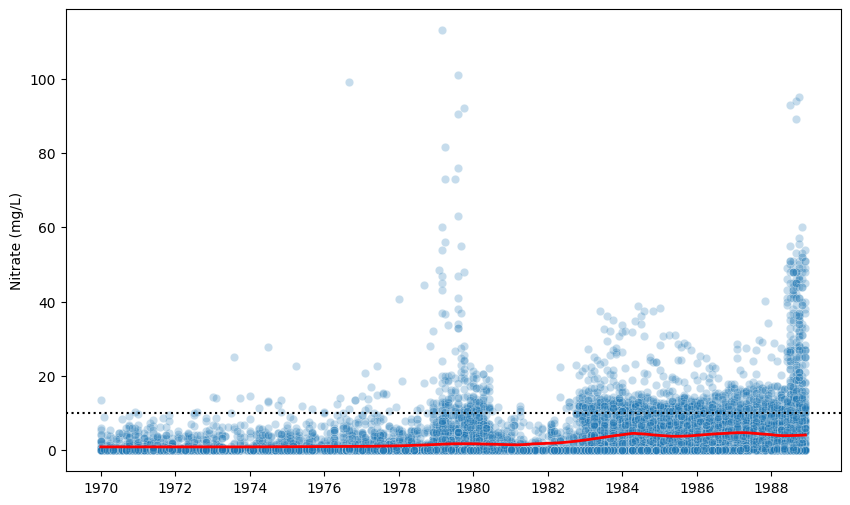

In [3]:
#Figure 1
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Scatter plot with LOWESS curve
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_water, x='month_year', y='nitrate_median', alpha=0.25)

# Compute LOWESS and plot
lowess = sm.nonparametric.lowess(df_water['nitrate_median'], df_water['month_year'], frac=0.2)
plt.plot(pd.to_datetime(lowess[:, 0]), lowess[:, 1], color='red', linewidth=2)
plt.axhline(y=10, color='black', linestyle=':', label='y=10')

# Plot customization
#Nitrate Measures in Public Water: Iowa (1970-1988)
plt.title('')
plt.xlabel('')
plt.ylabel('Nitrate (mg/L)')
plt.savefig('Figure1.pdf', format='pdf', dpi=600)  # dpi can be adjusted for higher resolution
plt.savefig('Figure1.jpeg', format='jpeg', dpi=600)  # dpi can be adjusted for higher resolution


Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
  STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      21      007  00516850  0500000US21007  21007  Ballard   06   639387454   
1      21      017  00516855  0500000US21017  21017  Bourbon   06   750439351   
2      21      031  00516862  0500000US21031  21031   Butler   06  1103571974   
3      21      065  00516879  0500000US21065  21065   Estill   06   655509930   
4      21      069  00516881  0500000US21069  21069  Fleming   06   902727151   

     AWATER                                           geometry  
0  69473325  POLYGON ((-89.18137 37.0463, -89.17938 37.0530...  
1   4829777  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
2  13943044  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
3   6516335  POLYGON ((-84.12662 37.6454, -84.12483 37.6461...  
4   7182793  POLYGON ((-83.98428 38.44549, -83.9

<Axes: >

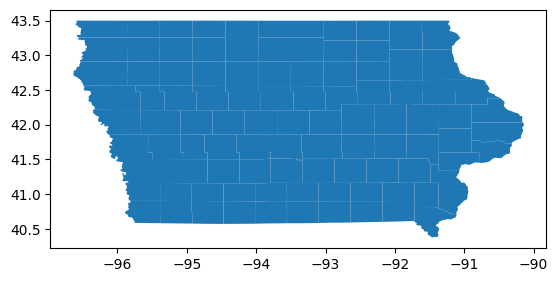

In [4]:
import geopandas as gpd

# 1. Load the shapefile (replace 'path_to_shapefile' with the actual path)
us_geo = gpd.read_file('/content/drive/MyDrive/Current Research/Water/water-raw/cb_2018_us_county_500k.shp')

# 2. Inspect the GeoDataFrame to identify the correct column
print(us_geo.columns)
print(us_geo.head())

# 3. Filter the GeoDataFrame for Iowa
# Assuming there is a column named 'STATE_NAME' or 'NAME' that identifies the states
iowa_gdf = us_geo[us_geo['STATEFP'] == '19']

# Alternatively, if the column is named differently, replace 'STATE_NAME' with the correct column name

# 4. Plot the Iowa shapefile to confirm
iowa_gdf.plot()


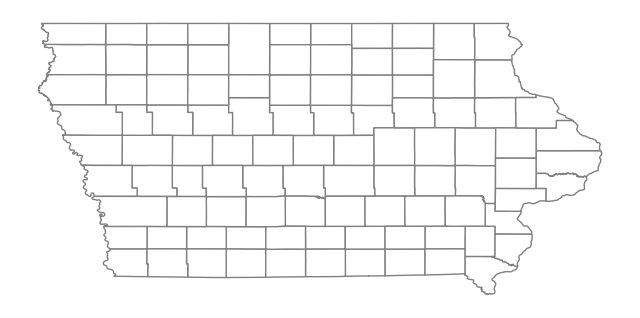

In [5]:

fig, ax = plt.subplots(figsize=(8, 8))
iowa_gdf.plot(ax=ax, color='white', edgecolor='gray')

# 4. Customize the plot - remove the latitude and longitude labels
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
ax.axis('off')

plt.show()

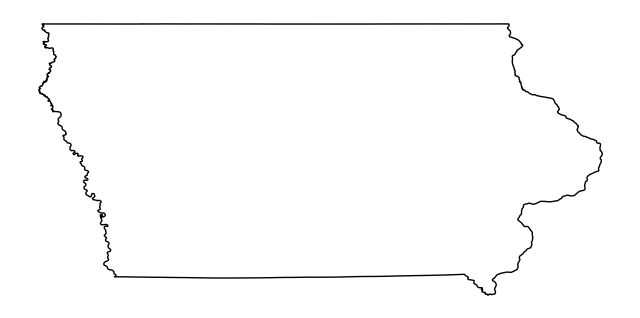

In [6]:

# 3. Dissolve the internal county boundaries to get a single shape for the state
iowa_dissolved = iowa_gdf.dissolve(by='STATEFP')

# 4. Plot the dissolved shapefile with custom styling
fig, ax = plt.subplots(figsize=(8, 8))
iowa_dissolved.plot(ax=ax, color='white', edgecolor='black')

# 5. Remove the latitude and longitude labels
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
ax.axis('off')

plt.show()

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

df_water["Coordinates"] = list(zip(df_water.Longitude, df_water.Latitude))
df_water["Coordinates"] = df_water["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_water, geometry="Coordinates")
gdf['nitrate_median_normalized'] = (gdf['nitrate_median'] - gdf['nitrate_median'].min()) / (gdf['nitrate_median'].max() - gdf['nitrate_median'].min())
gdf['nitrate_menitrate_median_normalizeddian_normalized'] = pd.to_numeric(gdf['nitrate_median_normalized'], errors='coerce')
gdf['limit'] = np.where(gdf['nitrate_median'] > 10, 1, 0)
gdf.head()


,countyname,year,month,day,nitrate_mean,nitrate_median,Latitude,Longitude,date_taken,month_year,Coordinates,nitrate_median_normalized,nitrate_menitrate_median_normalizeddian_normalized,limit
0,Adair,1970,9,10,0.113000,0.1130,41.503820,-94.316260,1970-09-10,1970-09-01,POINT (-94.31626 41.50382),0.001000,0.001000,0
1,Adair,1971,4,30,1.170125,1.2095,41.291950,-94.540005,1971-04-30,1971-04-01,POINT (-94.54 41.29195),0.010704,0.010704,0
2,Adair,1971,8,2,0.110000,0.1100,41.301839,-94.483226,1971-08-02,1971-08-01,POINT (-94.48323 41.30184),0.000973,0.000973,0
3,Adair,1971,12,13,0.440500,0.4405,41.301839,-94.483226,1971-12-13,1971-12-01,POINT (-94.48323 41.30184),0.003898,0.003898,0
4,Adair,1972,2,1,0.956333,0.7000,41.503820,-94.316260,1972-02-01,1972-02-01,POINT (-94.31626 41.50382),0.006195,0.006195,0


(-96.96468614999999, -89.81507885, 40.21921625, 43.65748075)

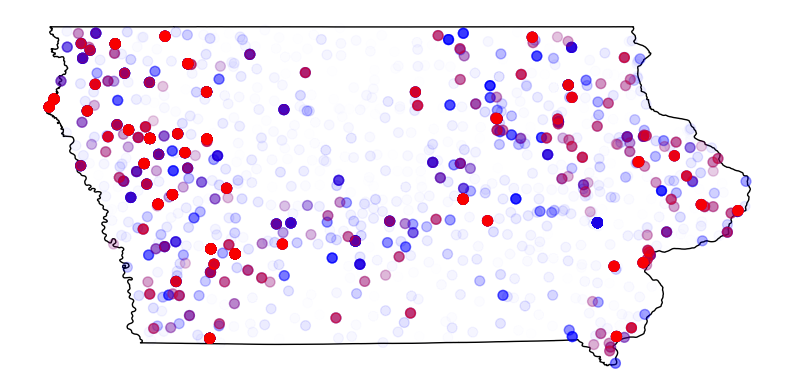

In [8]:
# Step 2: Simple Plot Test

# Assuming df is your original dataframe and 'limit' has already been generated
gdf_lim = gdf[gdf['limit'] == 1]

fig, gax = plt.subplots(figsize=(10, 10))

# Plot the dissolved Iowa GeoDataFrame with custom styling
iowa_dissolved.plot(ax=gax, edgecolor='black', color='white')

# Try plotting just the points with a simple configuration
gdf.plot(ax=gax, color='blue', markersize=50, alpha=gdf['nitrate_median_normalized'])
gdf_lim.plot(ax=gax, color='red', markersize=50, alpha=gdf_lim['nitrate_median_normalized'])




# Remove the latitude and longitude labels
gax.set_xticks([])  # Remove x-axis labels
gax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
gax.axis('off')

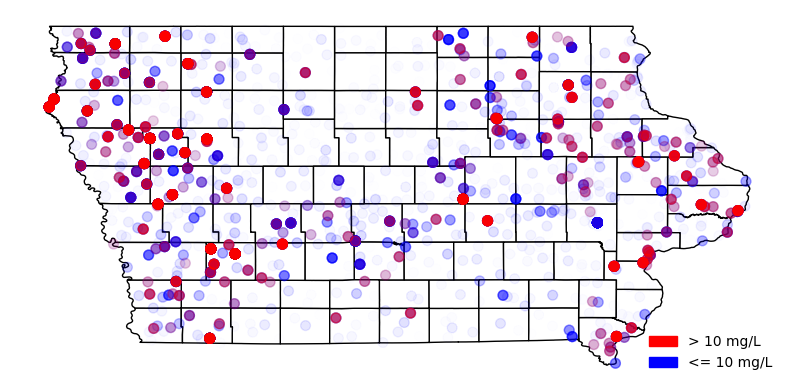

In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Step 2: Simple Plot Test

# Assuming df is your original dataframe and 'limit' has already been generated
gdf_lim = gdf[gdf['limit'] == 1]

fig, gax = plt.subplots(figsize=(10, 10))

# Plot the dissolved Iowa GeoDataFrame with custom styling
iowa_gdf.plot(ax=gax, edgecolor='black', color='white')

# Plot the points for nitrate levels
gdf.plot(ax=gax, color='blue', markersize=50, alpha=gdf['nitrate_median_normalized'])
gdf_lim.plot(ax=gax, color='red', markersize=50, alpha=gdf_lim['nitrate_median_normalized'])

# Remove the latitude and longitude labels
gax.set_xticks([])  # Remove x-axis labels
gax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
gax.axis('off')

# Create custom legend entries
red_patch = mpatches.Patch(color='red', label='> 10 mg/L')
blue_patch = mpatches.Patch(color='blue', label='<= 10 mg/L')

# Add the legend to the plot
plt.legend(handles=[red_patch, blue_patch], loc='lower right', frameon=False)

# Show the plot
#plt.show()
plt.savefig('Figure2.pdf', format='pdf', dpi=600)  # dpi can be adjusted for higher resolution
plt.savefig('Figure2.jpeg', format='jpeg', dpi=600)  # dpi can be adjusted for higher resolution


(-96.96468614999999, -89.81507885, 40.21921625, 43.65748075)

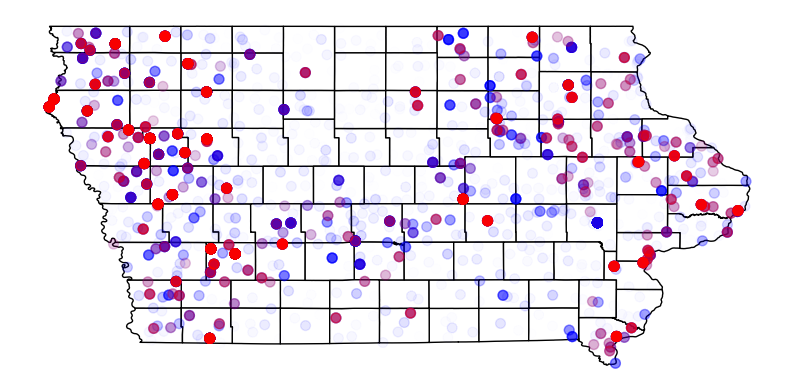

In [ ]:
# Step 2: Simple Plot Test

# Assuming df is your original dataframe and 'limit' has already been generated
gdf_lim = gdf[gdf['limit'] == 1]

fig, gax = plt.subplots(figsize=(10, 10))

# Plot the dissolved Iowa GeoDataFrame with custom styling
iowa_gdf.plot(ax=gax, edgecolor='black', color='white')

# Try plotting just the points with a simple configuration
gdf.plot(ax=gax, color='blue', markersize=50, alpha=gdf['nitrate_median_normalized'])
gdf_lim.plot(ax=gax, color='red', markersize=50, alpha=gdf_lim['nitrate_median_normalized'])




# Remove the latitude and longitude labels
gax.set_xticks([])  # Remove x-axis labels
gax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
gax.axis('off')

In [10]:
import pandas as pd

file_path = '/content/drive/MyDrive/Current Research/Water/linked_birth_water_county1970-1988.csv'
df_linked = pd.read_csv(file_path)

print(df_linked.shape)

df_linked.head()

(725756, 104)


,datayear,rectype,restatus,stateres,cntyres,cityres,citrspop,smsares,metrores,divres,...,fips,county,pop_2000,Latitude,Longitude,start,date_taken,x,d,nitrate_median
0,0,2,3,16,16084,999,9,0,2,4,...,19167,Sioux,31589,43.078397,-96.165810,1970-06-25,1970-06-25,NaN,-89.0,1.1125
1,0,2,3,16,16086,999,9,0,2,4,...,19171,Tama,18103,42.066911,-92.541437,1969-11-10,1969-11-10,NaN,-57.0,0.1130
2,0,2,3,16,16064,999,9,0,2,4,...,19127,Marshall,39311,42.031702,-92.937291,1969-10-26,1969-10-26,NaN,-98.0,0.0000
3,0,2,3,16,16016,999,9,0,2,4,...,19031,Cedar,18187,41.760598,-91.136340,1970-01-18,1970-01-18,NaN,-577.0,0.0000
4,0,2,3,16,16048,999,9,0,2,4,...,19095,Iowa,15671,41.703898,-92.046364,1970-05-07,1970-05-07,NaN,-179.0,0.0250


In [11]:
#160,462 observations above 30-day delta
#171,260 observations below -30-day delta

df_linked = df_linked[df_linked['d'] <= 30]
df_linked = df_linked[df_linked['d'] >= -30]

count_over_30 = (df_linked['d'] > 30).sum()
count_under_30 = (df_linked['d'] < -30).sum()

df_linked = df_linked[df_linked['dgestat'] <= 80]

# Print the result
print(f"Number of observations where d > 30: {count_over_30}")
print(f"Number of observations where d < -30: {count_under_30}")

Number of observations where d > 30: 0
Number of observations where d < -30: 0


In [12]:
# Ensure that the variable `d` exists in df_linked
if 'd' in df_linked.columns:
    # Summary statistics
    d_mean = df_linked['d'].mean()
    d_variance = df_linked['d'].var()
    d_min = df_linked['d'].min()
    d_max = df_linked['d'].max()
    d_median = df_linked['d'].median()

    # Interquartile Range (IQR)
    Q1 = df_linked['d'].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df_linked['d'].quantile(0.75)  # Third quartile (75th percentile)
    d_iqr = Q3 - Q1

    # Print the results
    print(f"Summary Statistics for 'd':")
    print(f"Mean: {d_mean}")
    print(f"Variance: {d_variance}")
    print(f"Interquartile Range (IQR): {Q1} to {Q3}")
    print(f"Minimum: {d_min}")
    print(f"Maximum: {d_max}")
    print(f"Median: {d_median}")

else:
    print("The column 'd' does not exist in df_linked.")


Summary Statistics for 'd':
Mean: 0.08393044462821843
Variance: 204.6349126744192
Interquartile Range (IQR): -10.0 to 10.0
Minimum: -30.0
Maximum: 30.0
Median: 0.0


In [13]:
# Count the number of observations where dbirwt is greater than 9000 (unknown value)
#17 observations with birthweight greater than 6000 (drop)
#
df_linked = df_linked[df_linked['dbirwt'] <= 9000]

count_over_6000 = (df_linked['dbirwt'] > 6000).sum()
count_under_500 = (df_linked['dbirwt'] < 500).sum()

df_linked = df_linked[df_linked['dgestat'] <= 80]

# Print the result
print(f"Number of observations where dbirwt > 6000: {count_over_6000}")
print(f"Number of observations where dbirwt < 500: {count_under_500}")

# Ensure that the variable `d` exists in df_linked
if 'dbirwt' in df_linked.columns:
    # Summary statistics
    d_sum = df_linked['dbirwt'].sum()
    d_mean = df_linked['dbirwt'].mean()
    d_variance = df_linked['dbirwt'].var()
    d_min = df_linked['dbirwt'].min()
    d_max = df_linked['dbirwt'].max()
    d_median = df_linked['dbirwt'].median()

    # Interquartile Range (IQR)
    Q1 = df_linked['dbirwt'].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df_linked['dbirwt'].quantile(0.75)  # Third quartile (75th percentile)
    d_iqr = Q3 - Q1

    # Print the results
    print(f"Summary Statistics for 'dbirwt':")
    print(f"Sum: {d_sum}")
    print(f"Mean: {d_mean}")
    print(f"Variance: {d_variance}")
    print(f"Interquartile Range (IQR): {Q1} - {Q3}")
    print(f"Minimum: {d_min}")
    print(f"Maximum: {d_max}")
    print(f"Median: {d_median}")

else:
    print("The column 'dbirwt' does not exist in df_linked.")

Number of observations where dbirwt > 6000: 17
Number of observations where dbirwt < 500: 300
Summary Statistics for 'dbirwt':
Sum: 1236469417
Mean: 3433.2067666250173
Variance: 333199.62047847966
Interquartile Range (IQR): 3119.0 - 3799.0
Minimum: 227
Maximum: 7711
Median: 3459.0


In [14]:

df_linked = df_linked[df_linked['dgestat'] >0]

count_over_50 = (df_linked['dgestat'] > 50).sum()
count_under_20 = (df_linked['dgestat'] < 20).sum()

#df_linked = df_linked[df_linked['dgestat'] <= 80]

# Print the result
print(f"Number of observations where dgestat > 50w: {count_over_50}")
print(f"Number of observations where dgestat < 20w: {count_under_20}")

# Ensure that the variable `d` exists in df_linked
if 'dgestat' in df_linked.columns:
    # Summary statistics
    d_mean = df_linked['dgestat'].mean()
    d_variance = df_linked['dgestat'].var()
    d_min = df_linked['dgestat'].min()
    d_max = df_linked['dgestat'].max()
    d_median = df_linked['dgestat'].median()

    # Interquartile Range (IQR)
    Q1 = df_linked['dgestat'].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df_linked['dgestat'].quantile(0.75)  # Third quartile (75th percentile)
    d_iqr = Q3 - Q1

    # Print the results
    print(f"Sum: {d_sum}")
    print(f"Mean: {d_mean}")
    print(f"Variance: {d_variance}")
    print(f"Interquartile Range (IQR): {Q1} - {Q3}")
    print(f"Minimum: {d_min}")
    print(f"Maximum: {d_max}")
    print(f"Median: {d_median}")

else:
    print("The column 'dbirwt' does not exist in df_linked.")

Number of observations where dgestat > 50w: 571
Number of observations where dgestat < 20w: 106
Sum: 1236469417
Mean: 39.708584703538314
Variance: 7.256512447272116
Interquartile Range (IQR): 39.0 - 41.0
Minimum: 17
Maximum: 52
Median: 40.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a scatter plot with a regression line
sns.regplot(x="year", y="nitrate_median", data=df_linked, scatter_kws={'alpha':0.1}, lowess=True)

# Set the title of the plot
ax.set_title('')

# Set the x-axis label
ax.set_xlabel('')

# Set the y-axis label
ax.set_ylabel('Nitrate (mg/L)')

plt.xlim(1969, 1989)
plt.xticks(range(1970, 1989, 3))
# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a scatter plot with a regression line
sns.regplot(x="year", y="dbirwt", data=df_linked, scatter_kws={'alpha':0.1}, lowess=True)

# Set the title of the plot
ax.set_title('')

# Set the x-axis label
ax.set_xlabel('')

# Set the y-axis label
ax.set_ylabel('Birth Weight (g)')

plt.xlim(1969, 1989)
plt.xticks(range(1970, 1989, 3))
# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a scatter plot with a regression line
sns.regplot(x="dgestat", y="dbirwt", data=df_linked, scatter_kws={'alpha':0.1}, lowess=True)

# Set the title of the plot
ax.set_title('')

# Set the x-axis label
ax.set_xlabel('Gestation (w)')

# Set the y-axis label
ax.set_ylabel('Birth Weight (g)')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

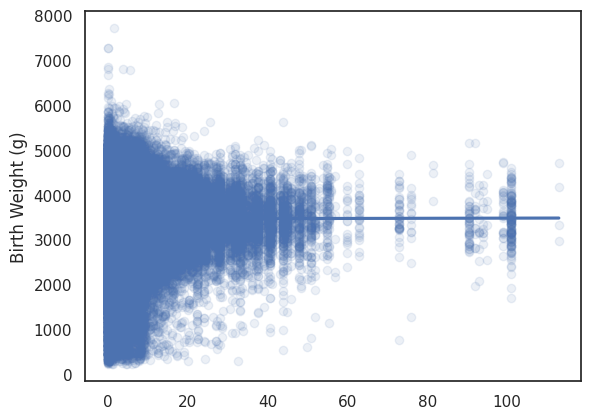

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a scatter plot with a regression line
sns.regplot(x="nitrate_median", y="dbirwt", data=df_linked, scatter_kws={'alpha':0.1}, lowess=True)

# Set the title of the plot
ax.set_title('')

# Set the x-axis label
ax.set_xlabel('')

# Set the y-axis label
ax.set_ylabel('Birth Weight (g)')

# Show the plot
plt.show()

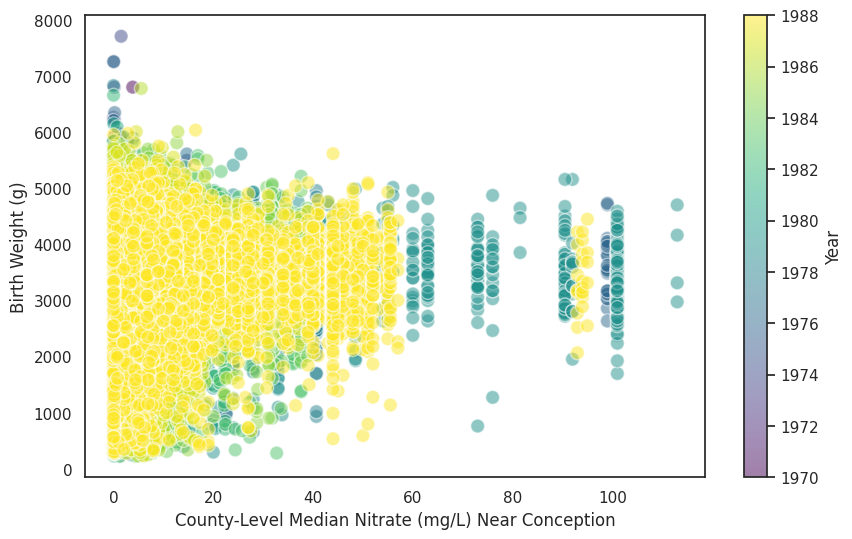

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' column to numeric if it's not already
df_linked['year'] = pd.to_numeric(df_linked['year'], errors='coerce')

plt.figure(figsize=(10, 6))

# Normalize the year data for the colormap
norm = plt.Normalize(df_linked['year'].min(), df_linked['year'].max())

# Create the scatter plot
scatter = plt.scatter(y=df_linked['dbirwt'],
                      x=df_linked['nitrate_median'],
                      c=df_linked['year'],
                      cmap='viridis',
                      edgecolor='w',
                      s=100,
                      norm=norm,
                      alpha=.5)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set labels and title
plt.xlabel('County-Level Median Nitrate (mg/L) Near Conception')
plt.ylabel('Birth Weight (g)')
plt.title('')
plt.grid(False)  # Only horizontal grid lines
plt.show()


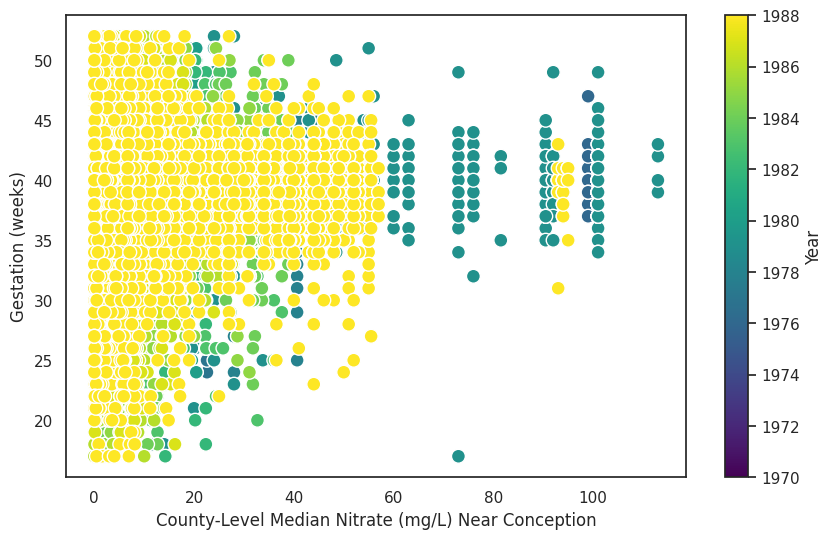

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' column to numeric if it's not already
df_linked['year'] = pd.to_numeric(df_linked['year'], errors='coerce')

plt.figure(figsize=(10, 6))

# Normalize the year data for the colormap
norm = plt.Normalize(df_linked['year'].min(), df_linked['year'].max())

# Create the scatter plot
scatter = plt.scatter(y=df_linked['dgestat'],
                      x=df_linked['nitrate_median'],
                      c=df_linked['year'],
                      cmap='viridis',
                      edgecolor='w',
                      s=100,
                      norm=norm)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set labels and title
plt.xlabel('County-Level Median Nitrate (mg/L) Near Conception')
plt.ylabel('Gestation (weeks)')
plt.title('')
plt.grid(False)  # Only horizontal grid lines
plt.show()


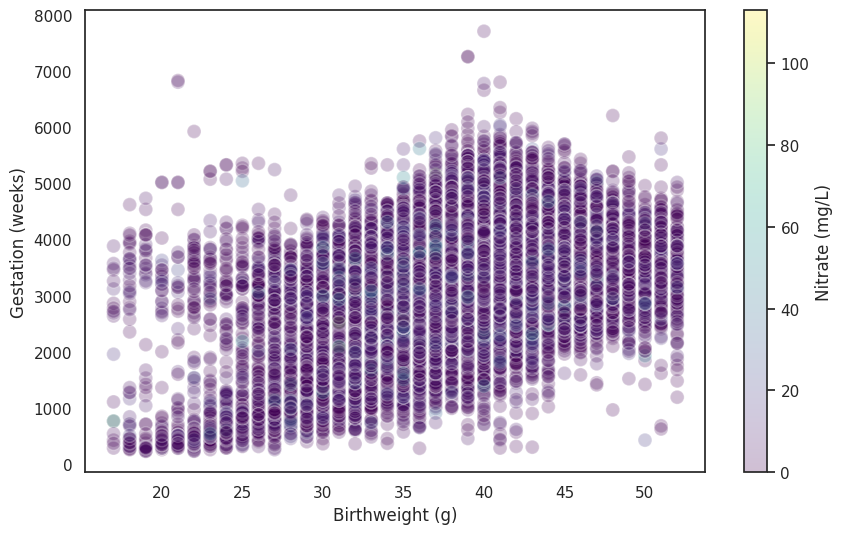

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' column to numeric if it's not already
df_linked['nitrate_median'] = pd.to_numeric(df_linked['nitrate_median'], errors='coerce')

plt.figure(figsize=(10, 6))

# Normalize the nitrate data for the colormap
norm = plt.Normalize(df_linked['nitrate_median'].min(), df_linked['nitrate_median'].max())

# Create the scatter plot
scatter = plt.scatter(y=df_linked['dbirwt'],
                      x=df_linked['dgestat'],
                      c=df_linked['nitrate_median'],
                      cmap='viridis',
                      edgecolor='w',
                      s=100,
                      norm=norm,
                      alpha=.25)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Nitrate (mg/L)')

# Set labels and title
plt.xlabel('Birthweight (g)')
plt.ylabel('Gestation (weeks)')
plt.title('')
plt.grid(False)  # Only horizontal grid lines
plt.show()


In [21]:
# Create variable w based on the conditions
df_linked['w'] = df_linked['d'].apply(lambda d: 1 if d == 0 else 1 / abs(d))

# Verify the new column
print(df_linked[['d', 'w']].head())


       d         w
16  30.0  0.033333
18  19.0  0.052632
28  -4.0  0.250000
29  -9.0  0.111111
45 -20.0  0.050000


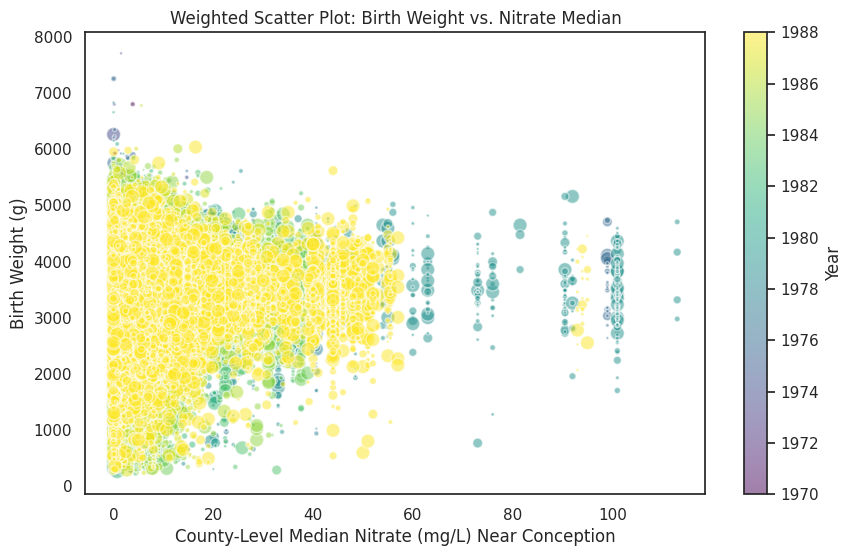

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'year' column is numeric
df_linked['year'] = pd.to_numeric(df_linked['year'], errors='coerce')

plt.figure(figsize=(10, 6))

# Normalize the year data for the colormap
norm = plt.Normalize(df_linked['year'].min(), df_linked['year'].max())

# Create the scatter plot, adjusting point size by weight ('w')
scatter = plt.scatter(y=df_linked['dbirwt'],
                      x=df_linked['nitrate_median'],
                      c=df_linked['year'],
                      cmap='viridis',
                      edgecolor='w',
                      s=df_linked['w'] * 100,  # Scale weights for visualization
                      norm=norm,
                      alpha=.5)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set labels and title
plt.xlabel('County-Level Median Nitrate (mg/L) Near Conception')
plt.ylabel('Birth Weight (g)')
plt.title('Weighted Scatter Plot: Birth Weight vs. Nitrate Median')
plt.grid(False)  # Only horizontal grid lines
plt.show()


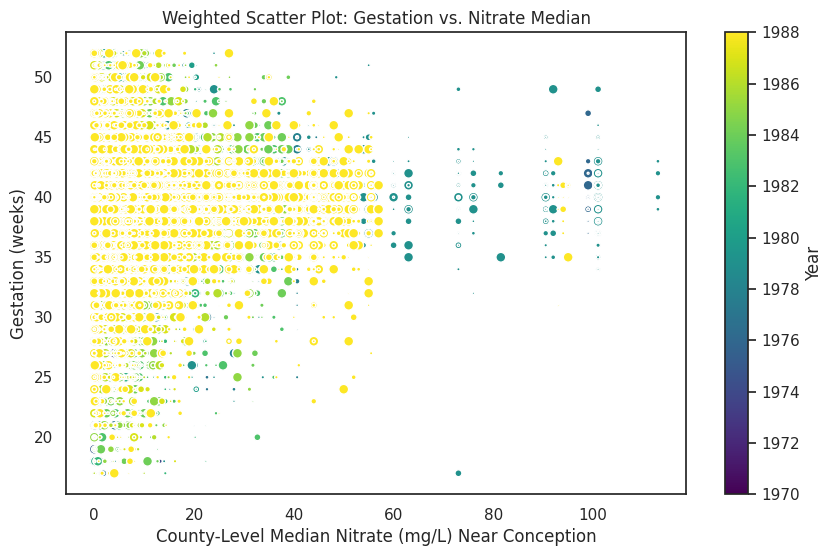

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'year' column is numeric
df_linked['year'] = pd.to_numeric(df_linked['year'], errors='coerce')

plt.figure(figsize=(10, 6))

# Normalize the year data for the colormap
norm = plt.Normalize(df_linked['year'].min(), df_linked['year'].max())

# Create the scatter plot, adjusting point size by weight ('w')
scatter = plt.scatter(y=df_linked['dgestat'],
                      x=df_linked['nitrate_median'],
                      c=df_linked['year'],
                      cmap='viridis',
                      edgecolor='w',
                      s=df_linked['w'] * 50,  # Scale weights for visualization
                      norm=norm)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set labels and title
plt.xlabel('County-Level Median Nitrate (mg/L) Near Conception')
plt.ylabel('Gestation (weeks)')
plt.title('Weighted Scatter Plot: Gestation vs. Nitrate Median')
plt.grid(False)  # Only horizontal grid lines
plt.show()


In [ ]:
# prompt: export df_linked to csv file

#df_linked.to_csv('df_linked_exported.csv', index=False)


In [24]:
# Creating 'ptb' and 'lbw' variables
df_linked['ptb'] = (df_linked['dgestat'] < 37).astype(int)
df_linked['lbw'] = (df_linked['dbirwt'] < 2500).astype(int)
df_linked['n_limit'] = (df_linked['nitrate_median'] > 10).astype(int)


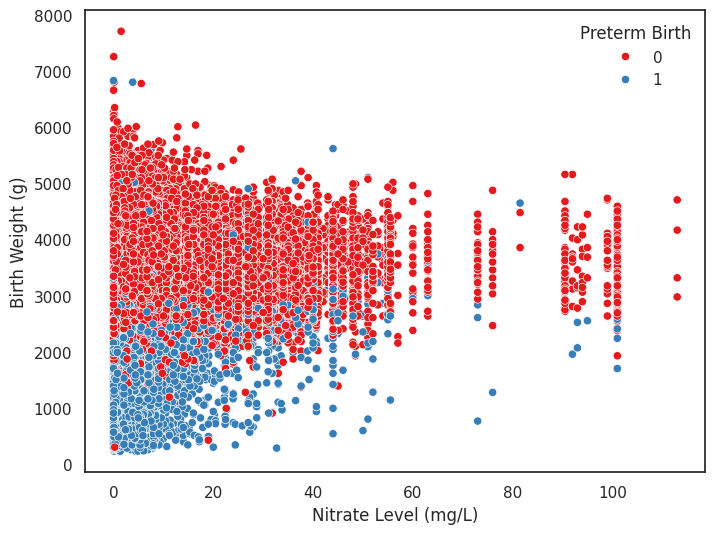

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_linked, x='nitrate_median', y='dbirwt', hue='ptb', palette="Set1")

# Add labels and title
plt.xlabel('Nitrate Level (mg/L)')
plt.ylabel('Birth Weight (g)')
plt.title('')
plt.legend(title="Preterm Birth", frameon=False)

# Show plot
#plt.show()
plt.savefig('Figure3.pdf', format='pdf', dpi=600)  # dpi can be adjusted for higher resolution
plt.savefig('Figure3.jpeg', format='jpeg', dpi=600)  # dpi can be adjusted for higher resolution
